In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
new_df = df.sample(10000)

In [4]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
279197,279197,398585,398586,Why is cannabis considered a depressant?,Why is weed considered a depressant?,1
117214,117214,58575,190775,What's your favorite song and why?,Music: What's your favourite song at the moment?,1
219759,219759,326711,326712,What is the underscore symbol?,What is the underscore symbol used for?,1
250211,250211,364022,94983,How much money per hour do Uber drivers make i...,How much money per hour do Uber drivers make i...,0
62538,62538,108980,108981,What is the best way to keep track of what boo...,What is the best way to read engineering text ...,0


In [7]:
new_df.duplicated().sum() #whether each row is duplicate of previous row or not 

0

0    6254
1    3746
Name: is_duplicate, dtype: int64
0    62.54
1    37.46
Name: is_duplicate, dtype: float64


<Axes: >

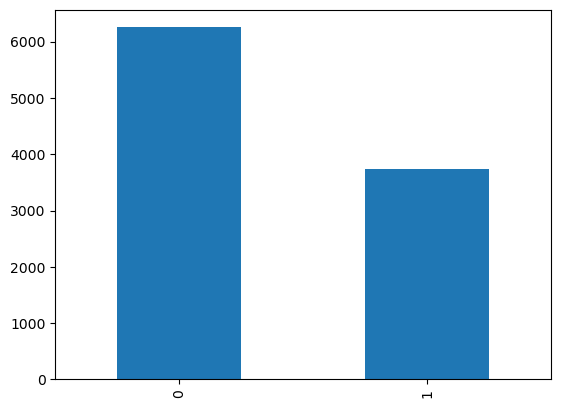

In [8]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 19386
Number of questions getting repeated 542


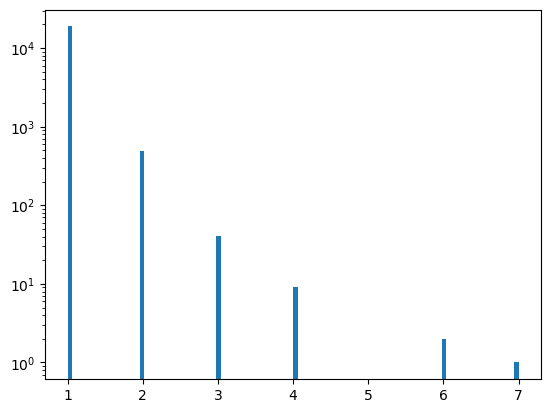

In [21]:
#repeated questions histogram 

plt.hist(qid.value_counts().values, bins=100)
plt.yscale('log')
plt.show()

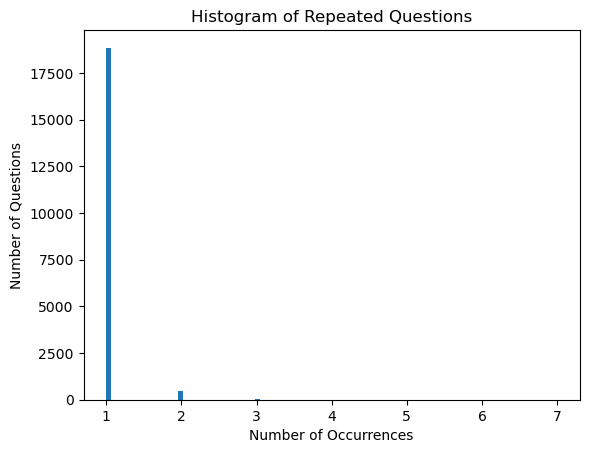

In [23]:
plt.hist(qid.value_counts(), bins=100)  # 'bins' specifies the number of bins in the histogram
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of Questions')
#plt.yscale('log')
plt.title('Histogram of Repeated Questions')
plt.show()


In [24]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
279197,279197,398585,398586,Why is cannabis considered a depressant?,Why is weed considered a depressant?,1,40,36
117214,117214,58575,190775,What's your favorite song and why?,Music: What's your favourite song at the moment?,1,34,48
219759,219759,326711,326712,What is the underscore symbol?,What is the underscore symbol used for?,1,30,39
250211,250211,364022,94983,How much money per hour do Uber drivers make i...,How much money per hour do Uber drivers make i...,0,119,117
62538,62538,108980,108981,What is the best way to keep track of what boo...,What is the best way to read engineering text ...,0,134,52


In [26]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
279197,279197,398585,398586,Why is cannabis considered a depressant?,Why is weed considered a depressant?,1,40,36,6,6
117214,117214,58575,190775,What's your favorite song and why?,Music: What's your favourite song at the moment?,1,34,48,6,8
219759,219759,326711,326712,What is the underscore symbol?,What is the underscore symbol used for?,1,30,39,5,7
250211,250211,364022,94983,How much money per hour do Uber drivers make i...,How much money per hour do Uber drivers make i...,0,119,117,23,21
62538,62538,108980,108981,What is the best way to keep track of what boo...,What is the best way to read engineering text ...,0,134,52,28,10


In [27]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [28]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
279197,279197,398585,398586,Why is cannabis considered a depressant?,Why is weed considered a depressant?,1,40,36,6,6,5
117214,117214,58575,190775,What's your favorite song and why?,Music: What's your favourite song at the moment?,1,34,48,6,8,3
219759,219759,326711,326712,What is the underscore symbol?,What is the underscore symbol used for?,1,30,39,5,7,4
250211,250211,364022,94983,How much money per hour do Uber drivers make i...,How much money per hour do Uber drivers make i...,0,119,117,23,21,18
62538,62538,108980,108981,What is the best way to keep track of what boo...,What is the best way to read engineering text ...,0,134,52,28,10,7


In [29]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [30]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
279197,279197,398585,398586,Why is cannabis considered a depressant?,Why is weed considered a depressant?,1,40,36,6,6,5,12
117214,117214,58575,190775,What's your favorite song and why?,Music: What's your favourite song at the moment?,1,34,48,6,8,3,14
219759,219759,326711,326712,What is the underscore symbol?,What is the underscore symbol used for?,1,30,39,5,7,4,12
250211,250211,364022,94983,How much money per hour do Uber drivers make i...,How much money per hour do Uber drivers make i...,0,119,117,23,21,18,40
62538,62538,108980,108981,What is the best way to keep track of what boo...,What is the best way to read engineering text ...,0,134,52,28,10,7,34


In [31]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
279197,279197,398585,398586,Why is cannabis considered a depressant?,Why is weed considered a depressant?,1,40,36,6,6,5,12,0.42
117214,117214,58575,190775,What's your favorite song and why?,Music: What's your favourite song at the moment?,1,34,48,6,8,3,14,0.21
219759,219759,326711,326712,What is the underscore symbol?,What is the underscore symbol used for?,1,30,39,5,7,4,12,0.33
250211,250211,364022,94983,How much money per hour do Uber drivers make i...,How much money per hour do Uber drivers make i...,0,119,117,23,21,18,40,0.45
62538,62538,108980,108981,What is the best way to keep track of what boo...,What is the best way to read engineering text ...,0,134,52,28,10,7,34,0.21


minimum characters 1
maximum characters 315
average num of characters 59


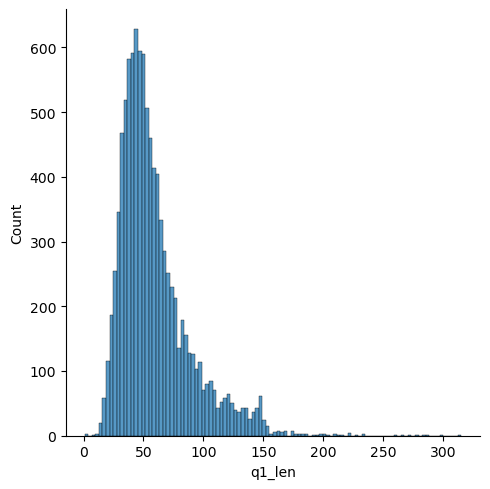

In [32]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 2
maximum characters 364
average num of characters 60


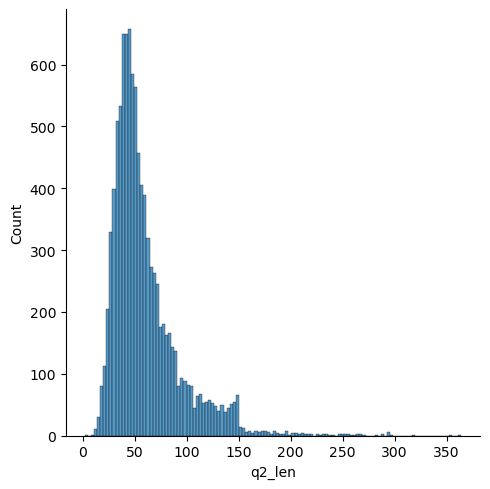

In [33]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 61
average num of words 10


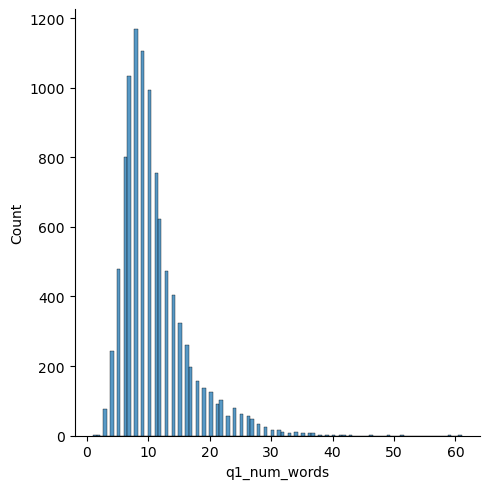

In [34]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))


minimum words 1
maximum words 77
average num of words 11


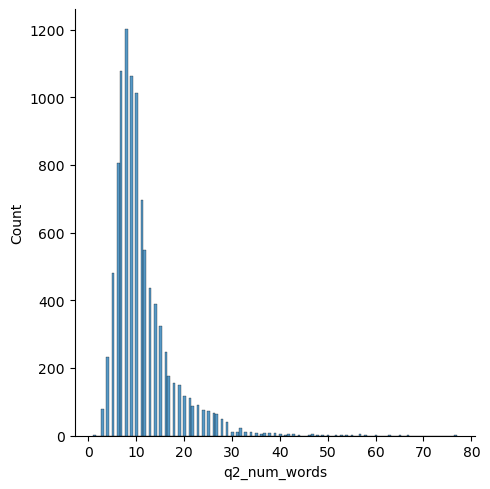

In [35]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

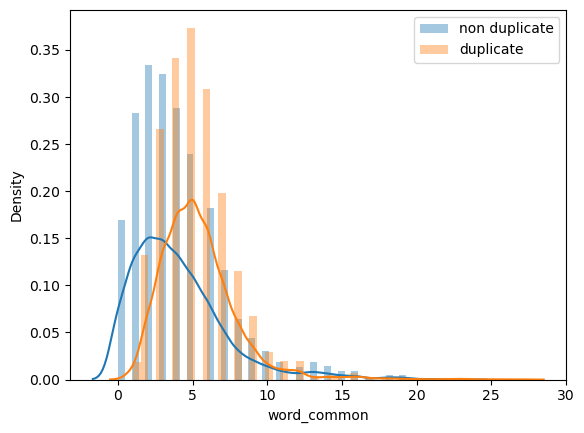

In [36]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

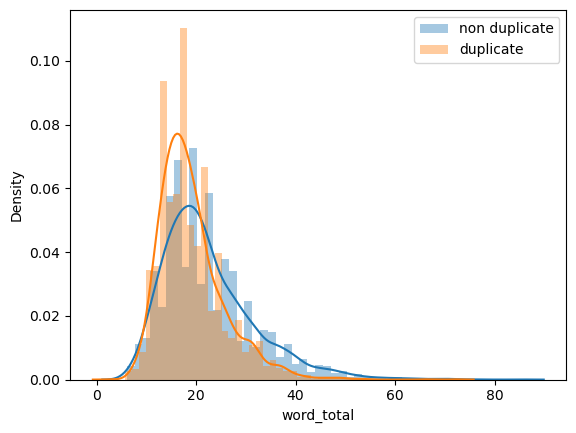

In [37]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

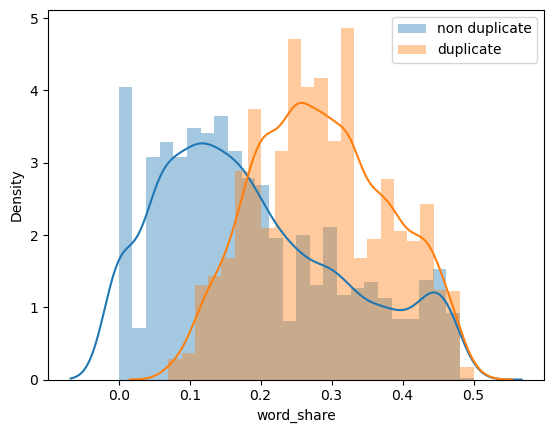

In [38]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [39]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
279197,Why is cannabis considered a depressant?,Why is weed considered a depressant?
117214,What's your favorite song and why?,Music: What's your favourite song at the moment?
219759,What is the underscore symbol?,What is the underscore symbol used for?
250211,How much money per hour do Uber drivers make i...,How much money per hour do Uber drivers make i...
62538,What is the best way to keep track of what boo...,What is the best way to read engineering text ...


In [40]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(10000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
279197,1,40,36,6,6,5,12,0.42
117214,1,34,48,6,8,3,14,0.21
219759,1,30,39,5,7,4,12,0.33
250211,0,119,117,23,21,18,40,0.45
62538,0,134,52,28,10,7,34,0.21


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=2000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [44]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(10000, 4000)

In [45]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
279197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
219759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(10000, 4008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
279197,1,40,36,6,6,5,12,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
117214,1,34,48,6,8,3,14,0.21,0,0,...,0,0,0,0,0,1,0,0,0,0
219759,1,30,39,5,7,4,12,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
250211,0,119,117,23,21,18,40,0.45,0,0,...,0,0,0,0,0,0,0,0,0,0
62538,0,134,52,28,10,7,34,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2)

In [48]:
# Assuming final_df contains the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size=0.2)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8000, 4007)
Shape of X_test: (2000, 4007)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.751

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.751

In [51]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))